In [430]:
# Import all libraries and modules needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [431]:
# Load the data from csv file
df=pd.read_csv('C:/Users/asnav/Documents/MachineLearningProjects/car_price_prediction_using_regression/data/car_price_training_data.csv')
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [432]:
# Show the first 5 rows of the DataFrame
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [433]:
# Show the last 5 rows of the DataFrame
df.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [434]:
# Get the number of rows and columns in the DataFrame
df.shape

(6019, 14)

In [435]:
# Show the data types of each column in the DataFrame
df.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [436]:
# Get the list of column names in the DataFrame
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [437]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [438]:
# Count the number of missing values in each column
df1=df['Location'].value_counts()
df1

Location
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: count, dtype: int64

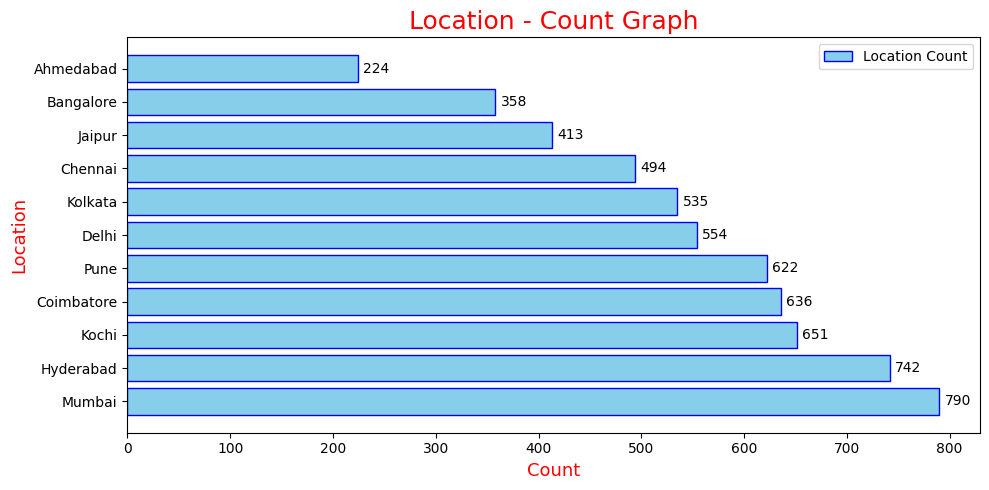

In [439]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Create a horizontal bar chart
plt.barh(df1.index,df1.values,color='skyblue',edgecolor='blue', label='Location Count')

# Label the x-axis and y-axis
plt.xlabel("Count",color='red',fontsize='13')
plt.ylabel("Location",color='red',fontsize='13')

# Add a title to the plot
plt.title("Location - Count Graph",color='red',fontsize='18')

# Add value labels to each bar
for i, v in enumerate(df1.values):
    plt.text(v + 5, i, str(v), color='k', fontsize=10, va='center')

# Display the legend in the upper right corner
plt.legend(loc='upper right')
# Adjust layout to prevent overlapping elements
plt.tight_layout()  
# Show the plot
plt.show()

In [440]:
df2=df['Fuel_Type'].value_counts()
df2

Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64

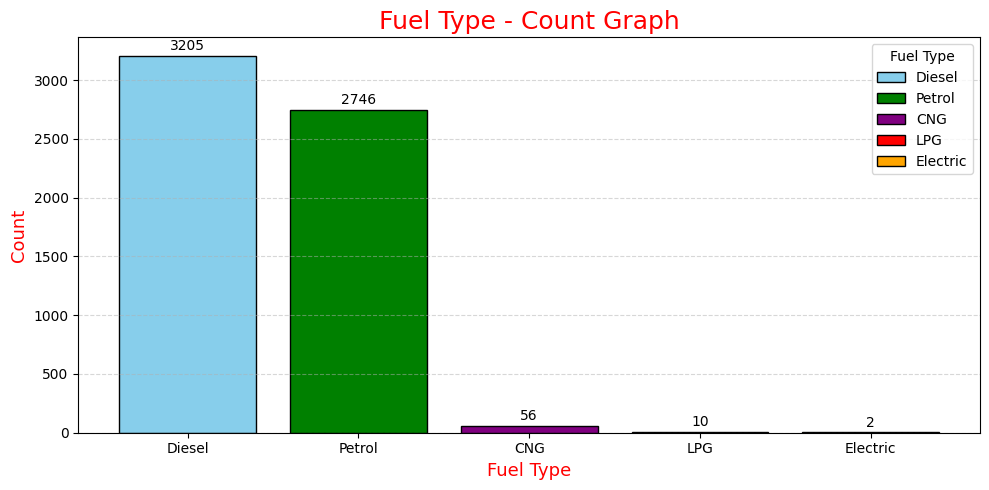

In [441]:
plt.figure(figsize=(10, 5))

# Create a bar chart with different colors for each bar
bars=plt.bar(df2.index,df2.values, color=['skyblue','green','purple','red', 'orange'], edgecolor='black')

plt.xlabel("Fuel Type",color='red',fontsize='13')
plt.ylabel("Count",color='red',fontsize='13')
plt.title("Fuel Type - Count Graph",color='red',fontsize='18')

for i, v in enumerate(df2.values):
    plt.text(i, v + 50, str(v), color='black', ha='center', fontsize=10)

plt.legend(bars, df2.index, title="Fuel Type", loc='upper right')
# Add a dashed gridline for better readability of values
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [442]:
df3=df['Transmission'].value_counts()
df3

Transmission
Manual       4299
Automatic    1720
Name: count, dtype: int64

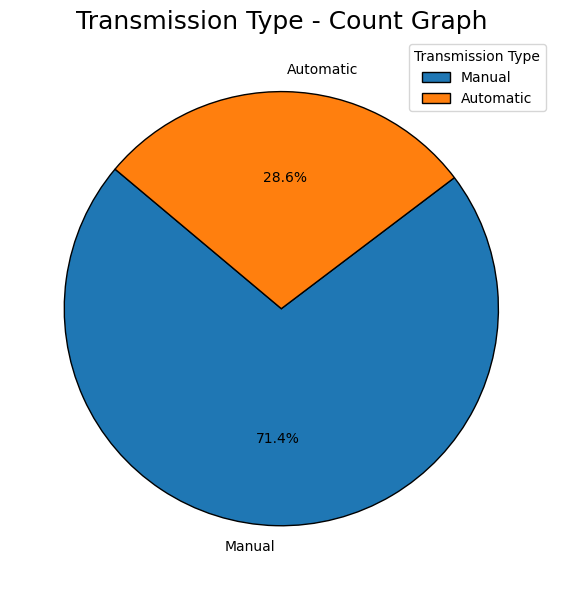

In [443]:
plt.figure(figsize=(6, 6))

# Create a pie chart
plt.pie(df3.values, labels=df3.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Transmission Type - Count Graph", color='k', fontsize=18)

plt.legend(title="Transmission Type", loc='upper right')
plt.tight_layout()
plt.show()


In [444]:
df4=df['Owner_Type'].value_counts()
df4

Owner_Type
First             4929
Second             968
Third              113
Fourth & Above       9
Name: count, dtype: int64

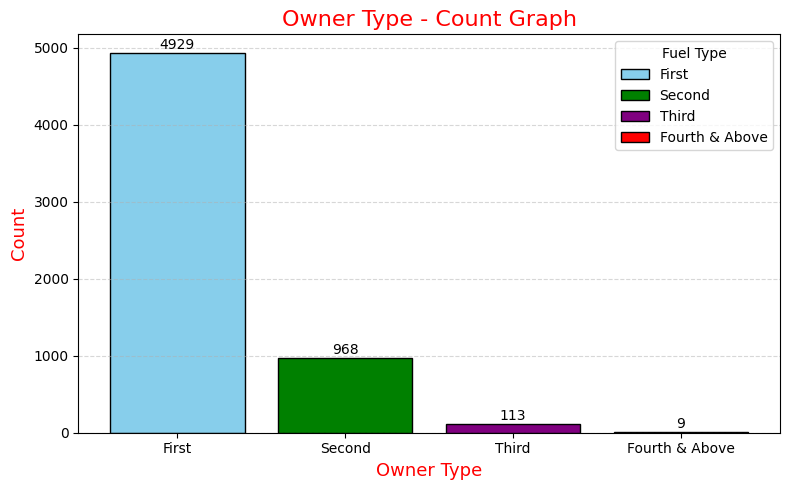

In [445]:
plt.figure(figsize=(8, 5))
bars = plt.bar(df4.index, df4.values, color=['skyblue', 'green', 'purple', 'red'], edgecolor='black')

plt.xlabel("Owner Type", color='red', fontsize=13)
plt.ylabel("Count", color='red', fontsize=13)
plt.title("Owner Type - Count Graph", color='red', fontsize=16)

for i, v in enumerate(df4.values):
    plt.text(i, v + 50, str(v), color='black', ha='center', fontsize=10)

plt.legend(bars, df4.index, title="Fuel Type", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [446]:
df5=df['Name'].value_counts()
df5

Name
Mahindra XUV500 W8 2WD                        49
Maruti Swift VDI                              45
Honda City 1.5 S MT                           34
Maruti Swift Dzire VDI                        34
Maruti Swift VDI BSIV                         31
                                              ..
Maruti Wagon R Duo Lxi                         1
Volkswagen Polo IPL II 1.2 Petrol Highline     1
Tata Bolt Revotron XT                          1
Honda                                          1
Mahindra Xylo D4 BSIV                          1
Name: count, Length: 1878, dtype: int64

In [447]:
# Extract the first word from the 'Name' column as the brand
df['Brand']=df['Name'].apply(lambda x:x.split()[0])
df['Brand']

0          Maruti
1         Hyundai
2           Honda
3          Maruti
4            Audi
          ...    
6014       Maruti
6015      Hyundai
6016     Mahindra
6017       Maruti
6018    Chevrolet
Name: Brand, Length: 6019, dtype: object

In [448]:
df.shape

(6019, 15)

In [449]:
df6=df['Brand'].value_counts()
df6

Brand
Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Isuzu               1
Ambassador          1
Bentley             1
Lamborghini         1
Name: count, dtype: int64

In [450]:
# Get the number of rows in the DataFrame df6
len(df6.index)

31

In [451]:
# Convert categorical columns into dummy/one-hot encoded variables
df7=pd.get_dummies(df[['Location','Fuel_Type','Transmission','Owner_Type','Brand']],drop_first=True,dtype=int)
df7

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [452]:
df7.shape

(6019, 48)

In [453]:
# Concatenate the original DataFrame with encoded DataFrame
df_train=pd.concat([df,df7],axis=1)
df_train

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,...,0,0,0,0,0,0,0,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,...,0,0,0,0,0,0,0,0,0,0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,...,0,0,0,0,0,0,0,0,0,0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,...,0,0,0,0,0,0,0,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,...,0,0,0,0,0,0,0,0,0,0
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,...,0,0,0,0,0,0,0,0,0,0
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,...,0,0,0,0,0,0,0,0,0,0
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,...,0,0,0,0,0,0,0,0,0,0


In [454]:
df_train.shape

(6019, 63)

In [455]:
# Drop unnecessary columns from df_train
df_train.drop(columns=["Unnamed: 0","Name", "Location","Fuel_Type","Transmission","Owner_Type","Brand","New_Price"],axis=1,inplace=True)

In [456]:
df_train.shape

(6019, 55)

In [457]:
df_train

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,2015,100000,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,2012,55000,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,2013,46000,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [458]:
# Removing units from numerical columns
df_train["Mileage"]=df_train["Mileage"].str.replace('km/kg','')
df_train["Mileage"]=df_train["Mileage"].str.replace('kmpl','')
df_train["Engine"]=df_train["Engine"].str.replace('CC','')
df_train["Power"]=df_train["Power"].str.replace('bhp','')
df_train

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000,26.6,998,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582,126.2,5.0,12.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.2,1199,88.7,5.0,4.50,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248,88.76,7.0,6.00,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.2,1968,140.8,5.0,17.74,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4,1248,74,5.0,4.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,2015,100000,24.4,1120,71,5.0,4.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,2012,55000,14.0,2498,112,8.0,2.90,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,2013,46000,18.9,998,67.1,5.0,2.65,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [459]:
# Replace 'null' string values with '0'
df_train["Mileage"]=df_train["Mileage"].str.replace('null','0')
df_train["Power"]=df_train["Power"].str.replace('null','0')
df_train["Engine"]=df_train["Engine"].str.replace('null','0')
df_train

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000,26.6,998,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582,126.2,5.0,12.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.2,1199,88.7,5.0,4.50,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248,88.76,7.0,6.00,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.2,1968,140.8,5.0,17.74,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4,1248,74,5.0,4.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,2015,100000,24.4,1120,71,5.0,4.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,2012,55000,14.0,2498,112,8.0,2.90,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,2013,46000,18.9,998,67.1,5.0,2.65,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [460]:
df_train.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                       object
Engine                        object
Power                         object
Seats                        float64
Price                        float64
Location_Bangalore             int64
Location_Chennai               int64
Location_Coimbatore            int64
Location_Delhi                 int64
Location_Hyderabad             int64
Location_Jaipur                int64
Location_Kochi                 int64
Location_Kolkata               int64
Location_Mumbai                int64
Location_Pune                  int64
Fuel_Type_Diesel               int64
Fuel_Type_Electric             int64
Fuel_Type_LPG                  int64
Fuel_Type_Petrol               int64
Transmission_Manual            int64
Owner_Type_Fourth & Above      int64
Owner_Type_Second              int64
Owner_Type_Third               int64
Brand_Audi                     int64
Brand_BMW                      int64
B

In [461]:
# Convert Mileage, Engine, and Power columns to float
df_train["Mileage"]=df_train["Mileage"].astype(float)
df_train["Engine"]=df_train["Engine"].astype(float) # int also applicable
df_train["Power"]=df_train["Power"].astype(float)
df_train

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,2013,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [462]:
df_train.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                      float64
Engine                       float64
Power                        float64
Seats                        float64
Price                        float64
Location_Bangalore             int64
Location_Chennai               int64
Location_Coimbatore            int64
Location_Delhi                 int64
Location_Hyderabad             int64
Location_Jaipur                int64
Location_Kochi                 int64
Location_Kolkata               int64
Location_Mumbai                int64
Location_Pune                  int64
Fuel_Type_Diesel               int64
Fuel_Type_Electric             int64
Fuel_Type_LPG                  int64
Fuel_Type_Petrol               int64
Transmission_Manual            int64
Owner_Type_Fourth & Above      int64
Owner_Type_Second              int64
Owner_Type_Third               int64
Brand_Audi                     int64
Brand_BMW                      int64
B

In [463]:
# Replace 0 values with NaN for Mileage, Power, and Engine
df_train[['Mileage', 'Power', 'Engine']] = df_train[['Mileage', 'Power', 'Engine']].replace(0, np.nan)
df_train

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,2013,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [464]:
df_train.isna().sum()

Year                           0
Kilometers_Driven              0
Mileage                       70
Engine                        36
Power                        143
Seats                         42
Price                          0
Location_Bangalore             0
Location_Chennai               0
Location_Coimbatore            0
Location_Delhi                 0
Location_Hyderabad             0
Location_Jaipur                0
Location_Kochi                 0
Location_Kolkata               0
Location_Mumbai                0
Location_Pune                  0
Fuel_Type_Diesel               0
Fuel_Type_Electric             0
Fuel_Type_LPG                  0
Fuel_Type_Petrol               0
Transmission_Manual            0
Owner_Type_Fourth & Above      0
Owner_Type_Second              0
Owner_Type_Third               0
Brand_Audi                     0
Brand_BMW                      0
Brand_Bentley                  0
Brand_Chevrolet                0
Brand_Datsun                   0
Brand_Fiat

In [465]:
# Show unique values in the 'Mileage' column
df_train["Mileage"].unique()

array([26.6 , 19.67, 18.2 , 20.77, 15.2 , 21.1 , 23.08, 11.36, 20.54,
       22.3 , 21.56, 16.8 , 25.2 , 12.7 ,   nan, 13.5 , 25.8 , 28.4 ,
       20.45, 14.84, 22.69, 23.65, 13.53, 18.5 , 14.4 , 20.92, 17.5 ,
       12.8 , 19.01, 14.53, 11.18, 12.4 , 16.09, 14.  , 24.3 , 18.15,
       11.74, 22.07, 19.7 , 25.4 , 25.32, 14.62, 14.28, 14.9 , 11.25,
       24.4 , 16.55, 17.11, 22.9 , 17.8 , 18.9 , 15.04, 25.17, 20.36,
       13.29, 13.68, 20.  , 15.8 , 25.  , 16.4 , 24.52, 22.1 ,  8.5 ,
       15.1 , 16.95, 19.64, 16.5 , 18.53, 17.57, 18.  , 23.2 , 16.73,
       17.  , 13.  , 17.68, 22.7 , 16.2 , 15.26, 23.  , 19.83, 14.94,
       17.71, 14.74, 16.  , 22.32, 12.99, 23.3 , 19.15, 10.8 , 15.  ,
       22.  , 21.9 , 12.05, 11.7 , 21.21, 20.73, 24.07, 19.  , 20.58,
       19.27, 11.5 , 18.6 , 21.14, 11.05, 21.76,  7.81, 21.66, 17.2 ,
       20.63, 19.4 , 14.8 , 26.  , 20.4 , 21.5 , 15.3 , 17.9 , 16.6 ,
       22.54, 25.44, 13.7 , 22.48, 12.9 , 19.98, 21.4 , 19.81, 15.4 ,
       25.47, 19.87,

In [466]:
# Fill missing values in Mileage with the column's mean
df_train["Mileage"]=df_train["Mileage"].fillna(df_train["Mileage"].mean())

In [467]:
df_train["Power"].unique()

array([ 58.16 , 126.2  ,  88.7  ,  88.76 , 140.8  ,  55.2  ,  63.1  ,
       171.5  , 103.6  ,  74.   , 103.25 , 116.3  , 187.7  , 115.   ,
       175.56 ,  98.6  ,  83.8  , 167.62 , 190.   ,  88.5  , 177.01 ,
        80.   ,  67.1  , 102.   , 108.45 , 138.1  , 184.   , 179.5  ,
       103.5  ,  64.   ,  82.   , 254.8  ,  73.9  ,  46.3  ,  37.5  ,
        77.   ,  82.9  , 149.92 , 138.03 , 112.2  , 163.7  ,  71.   ,
       105.   , 174.33 ,  75.   , 103.2  ,  53.3  ,  78.9  , 147.6  ,
       147.8  ,  68.   , 186.   , 170.   ,  69.   , 140.   ,  78.   ,
       194.   , 500.   , 108.5  ,  86.8  , 187.74 ,     nan, 132.   ,
        86.7  ,  73.94 , 117.3  , 218.   , 168.5  ,  89.84 , 110.   ,
        90.   ,  82.85 ,  67.   , 241.4  ,  35.   , 270.9  , 126.32 ,
        73.   , 130.   , 100.6  , 150.   ,  75.94 , 215.   , 107.3  ,
        37.48 , 120.   , 178.   , 152.   ,  91.1  ,  85.8  , 362.07 ,
       121.3  , 143.   ,  81.8  , 171.   ,  76.8  , 103.52 , 444.   ,
       362.9  ,  67.

In [468]:
df_train["Engine"].unique()

array([ 998., 1582., 1199., 1248., 1968.,  814., 1461., 2755., 1598.,
       1462., 1497., 2179., 2477., 1498., 2143., 1995., 1984., 1197.,
       2494., 1798., 2696., 2698., 1061., 1198., 2987.,  796.,  624.,
       1999., 1991., 2694., 1120., 2498.,  799., 2393., 1399., 1796.,
       2148., 1396., 1950., 4806., 1998., 1086., 1193., 2982., 1493.,
       2967., 2993., 1196., 1799., 2497., 2354., 1373., 2996., 1591.,
       2894., 5461., 1595.,  936., 1997.,   nan, 1896., 1390., 1364.,
       2199.,  993.,  999., 1405., 2956., 1794.,  995., 2496., 1599.,
       2400., 1495., 2523.,  793., 4134., 1596., 1395., 2953., 1586.,
       2362., 1496., 1368., 1298., 1956., 1299., 3498., 2835., 1150.,
       3198., 1343., 1499., 1186., 1590., 2609., 2499., 2446., 1978.,
       2360., 3436., 2198., 4367., 2706., 1422., 2979., 1969., 1489.,
       2489., 1242., 1388., 1172., 2495., 1194., 3200., 1781., 1341.,
       2773., 3597., 1985., 2147., 1047., 2999., 2995., 2997., 1948.,
       2359., 4395.,

In [469]:
df_train["Seats"].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [470]:
df_train["Power"]=df_train["Power"].fillna(df_train["Power"].mean())
df_train["Engine"]=df_train["Engine"].fillna(df_train["Engine"].mean())
df_train["Seats"]=df_train["Seats"].fillna(df_train["Seats"].mode()[0])

In [471]:
df_train.isna().sum()

Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Price                        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_Electric           0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
Brand_Audi                   0
Brand_BMW                    0
Brand_Bentley                0
Brand_Chevrolet              0
Brand_Datsun                 0
Brand_Fiat                   0
Brand_Force                  0
Brand_Fo

In [472]:
df8=pd.read_csv("C:/Users/asnav/Documents/MachineLearningProjects/car_price_prediction_using_regression/data/car_price_testing_data.csv")
df8

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [473]:
df8.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [474]:
df8.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN
1233,1233,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN


In [475]:
df8.shape

(1234, 13)

In [476]:
df8.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price'],
      dtype='object')

In [477]:
df8.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
dtype: object

In [478]:
df8.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [479]:
df9=df8["Location"].value_counts()
df9

Location
Mumbai        159
Pune          143
Coimbatore    136
Hyderabad     134
Kochi         121
Kolkata       119
Delhi         106
Chennai        97
Jaipur         86
Bangalore      82
Ahmedabad      51
Name: count, dtype: int64

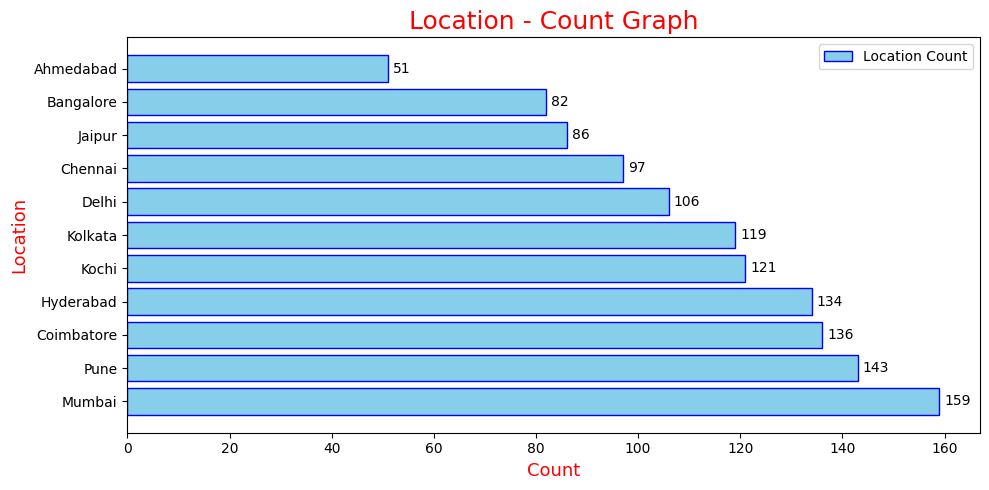

In [480]:
plt.figure(figsize=(10, 5))
plt.barh(df9.index,df9.values,color='skyblue',edgecolor='blue', label='Location Count')
plt.xlabel("Count",color='red',fontsize='13')
plt.ylabel("Location",color='red',fontsize='13')
plt.title("Location - Count Graph",color='red',fontsize='18')

for i, v in enumerate(df9.values):
    plt.text(v+1, i, str(v), color='k', fontsize=10, va='center')

plt.legend(loc='upper right')
plt.tight_layout()  
plt.show()

In [481]:
df10=df8["Fuel_Type"].value_counts()
df10

Fuel_Type
Diesel    647
Petrol    579
CNG         6
LPG         2
Name: count, dtype: int64

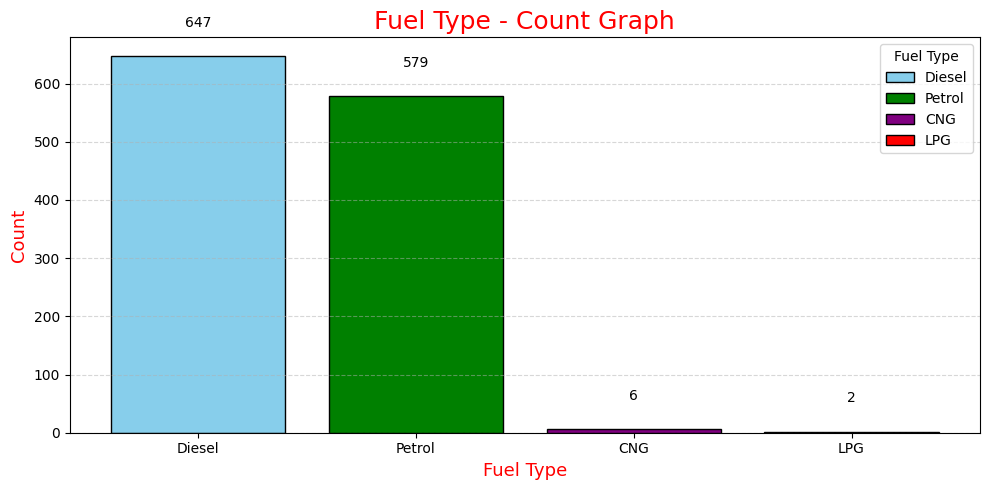

In [482]:
plt.figure(figsize=(10, 5))
bars=plt.bar(df10.index,df10.values, color=['skyblue','green','purple','red', 'orange'], edgecolor='black')
plt.xlabel("Fuel Type",color='red',fontsize='13')
plt.ylabel("Count",color='red',fontsize='13')
plt.title("Fuel Type - Count Graph",color='red',fontsize='18')

for i, v in enumerate(df10.values):
    plt.text(i, v + 50, str(v), color='black', ha='center', fontsize=10)

plt.legend(bars, df10.index, title="Fuel Type", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [483]:
df11=df8["Transmission"].value_counts()
df11

Transmission
Manual       905
Automatic    329
Name: count, dtype: int64

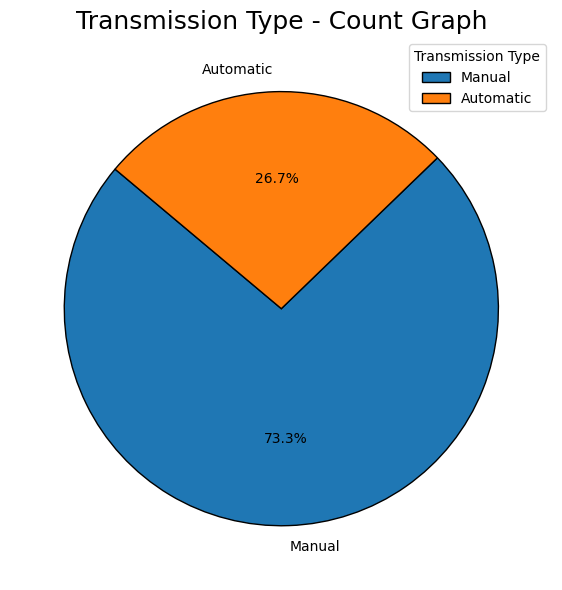

In [484]:
plt.figure(figsize=(6, 6))

plt.pie(df11.values, labels=df11.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Transmission Type - Count Graph", color='k', fontsize=18)

plt.legend(title="Transmission Type", loc='upper right')
plt.tight_layout()
plt.show()


In [485]:
df12=df8["Owner_Type"].value_counts()
df12

Owner_Type
First             1023
Second             184
Third               24
Fourth & Above       3
Name: count, dtype: int64

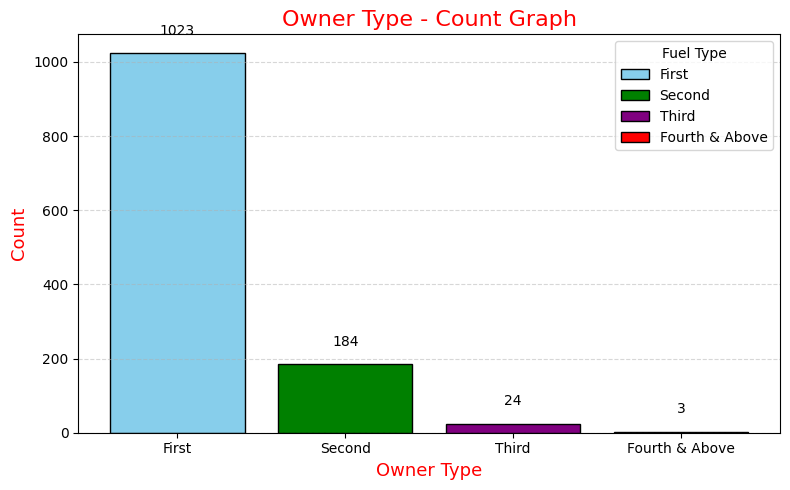

In [486]:
plt.figure(figsize=(8, 5))
bars = plt.bar(df12.index, df12.values, color=['skyblue', 'green', 'purple', 'red'], edgecolor='black')

plt.xlabel("Owner Type", color='red', fontsize=13)
plt.ylabel("Count", color='red', fontsize=13)
plt.title("Owner Type - Count Graph", color='red', fontsize=16)

for i, v in enumerate(df12.values):
    plt.text(i, v + 50, str(v), color='black', ha='center', fontsize=10)

plt.legend(bars, df12.index, title="Fuel Type", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [487]:
df8["Name"].value_counts()

Name
Maruti Alto LXi                        9
Maruti Swift Dzire VDI                 8
Volkswagen Polo 1.2 MPI Highline       8
Honda City 1.5 V MT                    8
Maruti Wagon R LXI                     7
                                      ..
Hyundai Verna 1.6 SX VTVT (O)          1
Jeep Compass 1.4 Sport                 1
Ford EcoSport 1.5 Petrol Ambiente      1
Volkswagen Vento Petrol Highline AT    1
Tata Tiago 1.05 Revotorq XT Option     1
Name: count, Length: 769, dtype: int64

In [488]:
df8["Brand"]=df8["Name"].apply(lambda x:x.split()[0])
df8["Brand"]

0              Maruti
1              Maruti
2              Toyota
3              Toyota
4             Hyundai
            ...      
1229       Volkswagen
1230       Volkswagen
1231           Nissan
1232       Volkswagen
1233    Mercedes-Benz
Name: Brand, Length: 1234, dtype: object

In [489]:
df13=df8["Brand"].value_counts()
df13

Brand
Maruti           233
Hyundai          233
Honda            135
Toyota            96
Mercedes-Benz     62
Mahindra          59
Volkswagen        59
Ford              51
Audi              49
BMW               45
Tata              42
Chevrolet         30
Skoda             29
Nissan            26
Renault           25
Fiat              10
Mitsubishi         9
Jaguar             8
Land               7
Volvo              7
Mini               5
Jeep               4
Datsun             4
Hindustan          1
Bentley            1
Isuzu              1
Porsche            1
ISUZU              1
OpelCorsa          1
Name: count, dtype: int64

In [490]:
len(df13.index)

29

In [491]:

df14=pd.get_dummies(df8[['Location','Fuel_Type','Transmission','Owner_Type','Brand']],drop_first=True,dtype=int)
df14

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1230,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1231,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1232,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [492]:
df14.shape

(1234, 45)

In [493]:
df_test=pd.concat([df8,df14],axis=1)
df_test

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,...,0,0,0,0,0,0,0,0,0,0
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,...,0,0,0,0,0,0,0,0,0,0
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,...,0,0,0,0,0,0,0,1,0,0
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,...,0,0,0,0,0,0,0,1,0,0
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,...,0,0,0,0,0,0,0,0,1,0
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,...,0,0,0,0,0,0,0,0,1,0
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,...,0,1,0,0,0,0,0,0,0,0
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,...,0,0,0,0,0,0,0,0,1,0


In [494]:
df_test.shape

(1234, 59)

In [495]:
df_test.drop(df_test[['Name','Unnamed: 0','New_Price','Location','Fuel_Type','Transmission','Owner_Type','Brand']],axis=1,inplace=True)
df_test

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2014,40929,32.26 km/kg,998 CC,58.2 bhp,4.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2013,54493,24.7 kmpl,796 CC,47.3 bhp,5.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,34000,13.68 kmpl,2393 CC,147.8 bhp,7.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2012,139000,23.59 kmpl,1364 CC,null bhp,5.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2014,29000,18.5 kmpl,1197 CC,82.85 bhp,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,20.54 kmpl,1598 CC,103.6 bhp,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1230,2015,59000,17.21 kmpl,1197 CC,103.6 bhp,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1231,2012,28000,23.08 kmpl,1461 CC,63.1 bhp,5.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1232,2013,52262,17.2 kmpl,1197 CC,103.6 bhp,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [496]:
df_test["Mileage"]=df_test["Mileage"].str.replace('km/kg','')
df_test["Mileage"]=df_test["Mileage"].str.replace('kmpl','')
df_test["Engine"]=df_test["Engine"].str.replace('CC','')
df_test["Power"]=df_test["Power"].str.replace('bhp','')
df_test

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2014,40929,32.26,998,58.2,4.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2013,54493,24.7,796,47.3,5.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,34000,13.68,2393,147.8,7.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2012,139000,23.59,1364,null,5.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2014,29000,18.5,1197,82.85,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,20.54,1598,103.6,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1230,2015,59000,17.21,1197,103.6,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1231,2012,28000,23.08,1461,63.1,5.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1232,2013,52262,17.2,1197,103.6,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [497]:
df_test["Mileage"]=df_test["Mileage"].str.replace('null','0')
df_test["Power"]=df_test["Power"].str.replace('null','0')
df_test["Engine"]=df_test["Engine"].str.replace('null','0')
df_test

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2014,40929,32.26,998,58.2,4.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2013,54493,24.7,796,47.3,5.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,34000,13.68,2393,147.8,7.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2012,139000,23.59,1364,0,5.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2014,29000,18.5,1197,82.85,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,20.54,1598,103.6,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1230,2015,59000,17.21,1197,103.6,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1231,2012,28000,23.08,1461,63.1,5.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1232,2013,52262,17.2,1197,103.6,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [498]:
df_test.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                       object
Engine                        object
Power                         object
Seats                        float64
Location_Bangalore             int64
Location_Chennai               int64
Location_Coimbatore            int64
Location_Delhi                 int64
Location_Hyderabad             int64
Location_Jaipur                int64
Location_Kochi                 int64
Location_Kolkata               int64
Location_Mumbai                int64
Location_Pune                  int64
Fuel_Type_Diesel               int64
Fuel_Type_LPG                  int64
Fuel_Type_Petrol               int64
Transmission_Manual            int64
Owner_Type_Fourth & Above      int64
Owner_Type_Second              int64
Owner_Type_Third               int64
Brand_BMW                      int64
Brand_Bentley                  int64
Brand_Chevrolet                int64
Brand_Datsun                   int64
B

In [499]:
df_test["Mileage"]=df_test["Mileage"].astype(float)
df_test["Engine"]=df_test["Engine"].astype(float) 
df_test["Power"]=df_test["Power"].astype(float)

In [500]:
df_test[['Mileage', 'Power', 'Engine']] = df_test[['Mileage', 'Power', 'Engine']].replace(0, np.nan)

In [501]:
df_test.isna().sum()

Year                          0
Kilometers_Driven             0
Mileage                      13
Engine                       10
Power                        32
Seats                        11
Location_Bangalore            0
Location_Chennai              0
Location_Coimbatore           0
Location_Delhi                0
Location_Hyderabad            0
Location_Jaipur               0
Location_Kochi                0
Location_Kolkata              0
Location_Mumbai               0
Location_Pune                 0
Fuel_Type_Diesel              0
Fuel_Type_LPG                 0
Fuel_Type_Petrol              0
Transmission_Manual           0
Owner_Type_Fourth & Above     0
Owner_Type_Second             0
Owner_Type_Third              0
Brand_BMW                     0
Brand_Bentley                 0
Brand_Chevrolet               0
Brand_Datsun                  0
Brand_Fiat                    0
Brand_Ford                    0
Brand_Hindustan               0
Brand_Honda                   0
Brand_Hy

In [502]:
df_test["Power"].unique()

array([ 58.2  ,  47.3  , 147.8  ,     nan,  82.85 , 140.   , 168.7  ,
        55.2  , 118.   , 167.6  ,  82.   , 125.   ,  75.   , 102.5  ,
       184.   ,  68.   ,  81.8  ,  85.8  ,  73.94 , 132.   ,  70.   ,
        46.3  ,  98.6  , 103.52 ,  80.   ,  67.06 , 103.6  ,  68.05 ,
       107.2  ,  74.   , 121.3  , 102.   , 190.   , 174.33 ,  88.5  ,
        91.1  , 136.   , 100.6  ,  89.84 , 153.86 , 174.3  ,  67.04 ,
        69.   ,  78.   , 138.1  ,  81.83 ,  88.8  ,  67.   ,  82.5  ,
       120.   , 108.62 ,  67.1  ,  86.8  ,  93.7  ,  62.   ,  84.   ,
        79.4  ,  63.1  , 100.   ,  81.86 , 175.67 ,  87.2  , 126.32 ,
       103.2  , 179.5  ,  88.76 ,  99.6  , 120.7  ,  62.1  ,  83.1  ,
       180.   ,  75.94 , 126.24 ,  35.   ,  73.9  , 138.13 , 201.15 ,
       218.   ,  57.6  , 147.51 , 224.   ,  66.1  , 130.3  , 177.   ,
        90.   , 123.24 , 130.   , 148.   ,  78.9  , 108.495, 187.7  ,
       204.   , 165.   ,  98.96 , 117.3  , 254.8  , 364.9  , 108.5  ,
       201.1  ,  88.

In [503]:
df_test["Engine"].unique()

array([ 998.,  796., 2393., 1364., 1197., 2179., 2982.,  814., 1497.,
       1968., 1794., 1248., 1598., 1995., 1399., 1298., 1198.,   nan,
       1799., 1299., 1498., 1086., 2835., 1591., 2494., 1373., 2143.,
       2953., 1396., 1798., 1199., 1196., 1461., 2487., 1582., 2496.,
       1368., 1596., 1595., 2354.,  624., 2993.,  936., 2987., 1999.,
        999., 2000., 1493., 1120., 3498., 1496., 1405., 1896., 2967.,
       2477., 1948., 1172., 1797., 2498., 1061., 1150., 1495., 2499.,
       1796., 2362., 2523., 5998., 2755., 2400., 2349.,  995., 1998.,
       2999., 1795., 1984.,  793., 1341., 1186., 1499., 1991.,  799.,
       1586., 2497., 1956., 1950., 1462., 1388., 1997., 3696., 2446.,
       2198., 2489., 2147., 2359., 2996., 2495., 2148., 4395., 1389.,
       1193., 2696., 2979., 1590., 1599., 1047.])

In [504]:
df_test["Mileage"].unique()

array([32.26, 24.7 , 13.68, 23.59, 18.5 , 16.  , 12.55, 21.1 , 17.  ,
       15.1 , 12.8 , 18.9 , 13.4 , 17.8 , 13.24, 17.05, 19.59, 13.8 ,
       22.  , 17.5 , 23.2 , 18.06, 15.5 , 19.7 , 27.3 , 21.66, 15.11,
       19.81, 10.5 , 23.4 , 19.1 , 14.84, 15.29, 22.48, 27.39, 17.11,
       16.55, 15.41, 24.52, 20.73, 20.  , 12.99, 18.88, 22.7 , 11.4 ,
       14.16, 17.01, 24.3 , 19.09, 17.7 , 14.53, 18.6 , 20.14, 23.  ,
       18.2 , 15.4 , 18.4 , 16.02,   nan, 18.16, 23.84, 23.08, 18.12,
       19.16, 21.43, 22.32, 21.21, 11.07, 13.07, 15.3 , 11.9 , 17.92,
       21.4 , 10.2 , 19.34, 19.  , 26.  , 25.8 , 22.07, 22.3 , 17.32,
       19.4 , 19.71, 16.47, 19.2 , 16.73, 19.3 , 21.9 , 26.59, 16.09,
       25.44, 18.51, 12.  , 19.83, 20.89, 13.9 , 22.74, 13.6 , 18.15,
       20.54, 14.4 , 13.5 , 18.  , 22.5 , 20.36, 13.1 , 16.36, 24.  ,
       15.  , 23.1 , 13.  , 14.8 , 17.3 , 11.3 , 10.13, 20.64, 16.78,
       14.3 , 21.64, 15.26, 15.04, 24.2 , 16.9 , 11.8 , 18.1 , 23.9 ,
       16.77, 14.1 ,

In [505]:
df_test["Seats"].unique()

array([ 4.,  5.,  7., nan,  6.,  8., 10.,  2.])

In [506]:
df_test["Engine"]=df_test["Engine"].fillna(df_test["Engine"].mean())
df_test["Mileage"]=df_test["Mileage"].fillna(df_test["Mileage"].mean())
df_test["Power"]=df_test["Power"].fillna(df_test["Power"].mean())
df_test["Seats"]=df_test["Seats"].fillna(df_test["Seats"].mode()[0])

In [507]:
df_test.isna().sum()

Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
Brand_BMW                    0
Brand_Bentley                0
Brand_Chevrolet              0
Brand_Datsun                 0
Brand_Fiat                   0
Brand_Ford                   0
Brand_Hindustan              0
Brand_Honda                  0
Brand_Hyundai                0
Brand_IS

In [ ]:
# Check column names of both DataFrames
df_train.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU',
       'Brand_Isuzu', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini',
       'Brand_Land', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz',
       'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche',
       'Brand_Renault', 'Brand_Skoda', 'Brand_Smart', 'Brand_Tata',
       'Brand_Toyota'

In [509]:
df_test.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Ford',
       'Brand_Hindustan', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU',
       'Brand_Isuzu', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Land',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_OpelCorsa', 'Brand_Porsche',
       'Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota',
       'Brand_Volkswagen', 'Brand_Volvo'],
      dtype='object')

In [ ]:
# Remove columns from df_train that are not present in df_test
df_train.drop(["Fuel_Type_Electric",'Brand_Audi',"Brand_Force",'Brand_Lamborghini','Brand_Smart'],inplace=True,axis=1)

# Remove columns from df_test that are not present in df_train
df_test.drop(["Brand_Hindustan",'Brand_OpelCorsa'],inplace=True,axis=1)

In [ ]:
# Remove the target column "Price" from df_train to create feature set x
x=df_train.drop(["Price"],axis=1)
x

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,2013,46000,18.90,998.0,67.10,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Extract the target variable "Price" from df_train
y=df_train["Price"]
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64

In [513]:
df_test

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2014,40929,32.26,998.0,58.20000,4.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2013,54493,24.70,796.0,47.30000,5.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,34000,13.68,2393.0,147.80000,7.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2012,139000,23.59,1364.0,110.38042,5.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2014,29000,18.50,1197.0,82.85000,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,20.54,1598.0,103.60000,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1230,2015,59000,17.21,1197.0,103.60000,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1231,2012,28000,23.08,1461.0,63.10000,5.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1232,2013,52262,17.20,1197.0,103.60000,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Initialize the Linear Regression model
model=LinearRegression()

# Train (fit) the model using training data
model.fit(x,y)

# Predict the target variable (Price) for the test dataset
y_pred=model.predict(df_test)
y_pred

array([ 2.4535847 ,  1.26972859, 16.72302279, ..., -0.03425225,
        5.77243299, 24.73047308], shape=(1234,))